In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import Hour, Minute
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Taxi In - Amount of time spent by the aircraft from the moment it lands and in the terminal.

Taxi Out - Period of time between an aircraft leaving a terminal gate and actually taking off from an airport.

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/BDA/airline delay analysis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


usecols=['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME','ARR_DELAY','DISTANCE', 'FL_DATE']
airlines = pd.read_csv('/content/drive/MyDrive/BDA/airline delay analysis/2019_cleaned.csv', usecols=usecols)

/content/drive/MyDrive/BDA/airline delay analysis/L_UNIQUE_CARRIERS.csv
/content/drive/MyDrive/BDA/airline delay analysis/2015-2019.csv
/content/drive/MyDrive/BDA/airline delay analysis/2019_cleaned.csv


In [ ]:
airliness = pd.read_csv('/content/drive/MyDrive/BDA/airline delay analysis/2015-2019.csv', usecols=usecols)
airlines['dt'] = pd.to_datetime(airlines['FL_DATE'])
airlines['WDAY'] = airlines['dt'].dt.dayofweek
airlines['DAY'] = airlines['dt'].dt.day
airlines['MONTH'] = airlines['dt'].dt.month
airlines['YEAR'] = airlines['dt'].dt.year
# airlines

In [ ]:
print("Size of dataset:",len(airliness))

Size of dataset: 31746841


In [ ]:
airliness.head()

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE
0,2015-01-01,NK,MCO,FLL,2143.0,-4.0,2245.0,-5.0,177
1,2015-01-01,NK,LGA,FLL,1104.0,14.0,1403.0,-1.0,1076
2,2015-01-01,NK,FLL,MCO,712.0,12.0,813.0,16.0,177
3,2015-01-01,NK,IAH,LAS,2251.0,11.0,2347.0,-9.0,1222
4,2015-01-01,NK,IAH,ORD,620.0,-3.0,840.0,-15.0,925


In [ ]:
airliness.tail()

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE
31746836,2019-12-31,B6,MCO,SWF,1500.0,64.0,1731.0,52.0,989
31746837,2019-12-31,B6,DCA,BOS,1414.0,-6.0,1533.0,-17.0,399
31746838,2019-12-31,B6,PHL,BOS,652.0,-8.0,751.0,-34.0,280
31746839,2019-12-31,B6,BOS,SJU,812.0,-1.0,1248.0,-27.0,1674
31746840,2019-12-31,B6,SJU,BOS,431.0,2.0,722.0,-16.0,1674


In [ ]:
airlines.drop(['dt'], axis=1)

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,WDAY,DAY,MONTH,YEAR
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300,1,1,1,2019
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596,1,1,1,2019
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229,1,1,1,2019
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223,1,1,1,2019
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579,1,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422032,2019-12-31,B6,MCO,SWF,1500.0,64.0,1731.0,52.0,989,1,31,12,2019
7422033,2019-12-31,B6,DCA,BOS,1414.0,-6.0,1533.0,-17.0,399,1,31,12,2019
7422034,2019-12-31,B6,PHL,BOS,652.0,-8.0,751.0,-34.0,280,1,31,12,2019
7422035,2019-12-31,B6,BOS,SJU,812.0,-1.0,1248.0,-27.0,1674,1,31,12,2019


In [ ]:
carriers = pd.read_csv('/content/drive/MyDrive/BDA/airline delay analysis/L_UNIQUE_CARRIERS.csv', names=['OP_UNIQUE_CARRIER', 'Carrier'])
# carriers

In [ ]:
data = pd.merge(airlines, carriers, how='left', on='OP_UNIQUE_CARRIER',  sort=True)
data

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,DISTANCE,dt,WDAY,DAY,MONTH,YEAR,Carrier
0,2019-01-01,9E,GNV,ATL,601.0,1.0,722.0,-1.0,300,2019-01-01,1,1,1,2019,Endeavor Air Inc.
1,2019-01-01,9E,MSP,CVG,1359.0,-5.0,1633.0,-36.0,596,2019-01-01,1,1,1,2019,Endeavor Air Inc.
2,2019-01-01,9E,DTW,CVG,1215.0,-5.0,1329.0,-16.0,229,2019-01-01,1,1,1,2019,Endeavor Air Inc.
3,2019-01-01,9E,TLH,ATL,1521.0,-6.0,1625.0,-14.0,223,2019-01-01,1,1,1,2019,Endeavor Air Inc.
4,2019-01-01,9E,ATL,FSM,1847.0,-15.0,1940.0,-25.0,579,2019-01-01,1,1,1,2019,Endeavor Air Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422032,2019-12-31,YX,PHL,MYR,1037.0,-3.0,1219.0,-8.0,473,2019-12-31,1,31,12,2019,Republic Airline
7422033,2019-12-31,YX,DCA,MSP,1359.0,0.0,1552.0,-3.0,931,2019-12-31,1,31,12,2019,Republic Airline
7422034,2019-12-31,YX,PVD,PHL,655.0,-5.0,819.0,-13.0,237,2019-12-31,1,31,12,2019,Republic Airline
7422035,2019-12-31,YX,ATL,CLT,512.0,-3.0,702.0,31.0,226,2019-12-31,1,31,12,2019,Republic Airline


In [ ]:
data['FINAL_DELAY'] = data['DEP_DELAY'] +  data['ARR_DELAY']
# data

In [ ]:
limits = [x * 100 for x in range(0,25)]
names = [x * 100 for x in range(0,24)]
data['HOUR'] = pd.cut(data['DEP_TIME'], limits, labels=names, right=True)
# data

In [ ]:
distance_limits = [x * 100 for x in range(0,27)]
distance_labels = [x * 100 for x in range(0,26)]
data['DISTANCE_INTERVALS'] = pd.cut(data['DISTANCE'], distance_limits, labels=distance_labels, right=False)
# data

In [ ]:
data['GAIN'] = data['DEP_DELAY'] - data['ARR_DELAY']
# data

In [ ]:
data_test = data[0:5]
# data_test

In [ ]:
only_airlines = data['Carrier'].unique()
print("Airlines:\n")
print(only_airlines)

Airlines:

['Endeavor Air Inc.' 'American Airlines Inc.' 'Alaska Airlines Inc.'
 'JetBlue Airways' 'Delta Air Lines Inc.' 'ExpressJet Airlines LLC'
 'Frontier Airlines Inc.' 'Allegiant Air' 'Hawaiian Airlines Inc.'
 'Envoy Air' 'Spirit Air Lines' 'PSA Airlines Inc.'
 'SkyWest Airlines Inc.' 'United Air Lines Inc.' 'Southwest Airlines Co.'
 'Mesa Airlines Inc.' 'Republic Airline']


In [ ]:
# Calculate the average delay time per airline
av_delay = pd.DataFrame(data.groupby('Carrier')['FINAL_DELAY'].mean(), columns=['FINAL_DELAY'], index=only_airlines)
av_delay = av_delay.rename(columns={'FINAL_DELAY': 'Average delay'})
print("\nAverage delay time per airline:")
av_delay


Average delay time per airline:


,Average delay
Endeavor Air Inc.,13.205530
American Airlines Inc.,18.989383
Alaska Airlines Inc.,6.311009
JetBlue Airways,28.821569
Delta Air Lines Inc.,9.277973
ExpressJet Airlines LLC,32.614659
Frontier Airlines Inc.,23.220545
Allegiant Air,18.096770
Hawaiian Airlines Inc.,1.915521
Envoy Air,16.036011


**Time Taken for Average Delay: 0.029s for execution and 1.148s for plotting graph.**

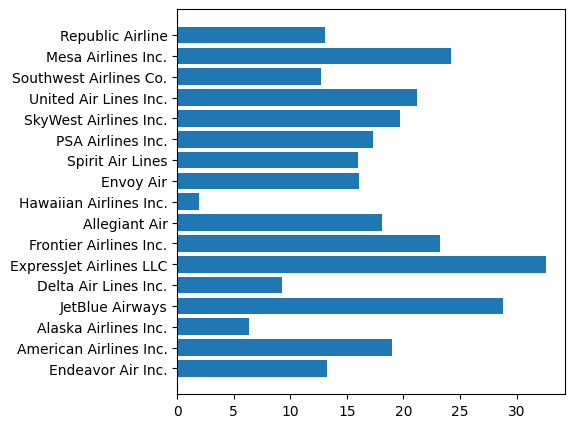

In [ ]:
plt.figure(figsize=(5,5))
plt.barh(av_delay.index,av_delay['Average delay']);

In [ ]:
#get only interesting columns
cols = ['ORIGIN', 'DEST', 'Carrier', 'FINAL_DELAY']
air_orig_dest = data[cols]

#set origin and destination and filter
orig = 'ABQ'
dest = 'ORD'
my_orig_dest = air_orig_dest[(air_orig_dest['ORIGIN'] == orig) & (air_orig_dest['DEST'] == dest)]

#compute the average delay on flights from ABQ to ORD
my_orig_dest = my_orig_dest['FINAL_DELAY'].groupby([ data['ORIGIN'], data['DEST'],data['Carrier']]).mean()

#printing results
print('Final delay time for each carrier:')
my_orig_dest

Final delay time for each carrier:


ORIGIN  DEST  Carrier                
ABQ     ORD   American Airlines Inc.     24.206074
              Envoy Air                  35.775401
              ExpressJet Airlines LLC    41.928571
              Republic Airline            4.622642
              SkyWest Airlines Inc.      41.016667
              United Air Lines Inc.      39.872340
Name: FINAL_DELAY, dtype: float64

**Time taken to analyze final delay time for each airline carrier from ABQ to ORD: 3.387s**

In [ ]:
#set intervals
limits = [0, 600, 1200, 1800, 2400]
names = ['early morning', 'morning', 'afternoon', 'night']
data['INTERVAL'] = pd.cut(data['DEP_TIME'], limits, labels=names, right=True)
data

#get only interesting columns
cols = ['ORIGIN', 'DEST', 'Carrier', 'FINAL_DELAY', 'DEP_TIME', 'INTERVAL']
my_orig_dest = data[cols]

#set origin and destination and filter
my_orig_dest = my_orig_dest[(my_orig_dest['ORIGIN'] == orig) & (my_orig_dest['DEST'] == dest)]

by_interval = my_orig_dest['FINAL_DELAY'].groupby([my_orig_dest['ORIGIN'], my_orig_dest['DEST'], my_orig_dest['Carrier'], my_orig_dest['INTERVAL']]).mean()
by_interval = pd.DataFrame(by_interval)
print('Final delay time for each carrier grouped by period of the day:')
by_interval

Final delay time for each carrier grouped by period of the day:


FINAL_DELAY
ORIGIN DEST Carrier                 INTERVAL                  
ABQ    ORD  American Airlines Inc.  early morning   -23.636364
                                    morning          23.874419
                                    afternoon        29.353774
                                    night           583.000000
            Envoy Air               early morning          NaN
                                    morning          44.631579
                                    afternoon        29.711712
                                    night                  NaN
            ExpressJet Airlines LLC early morning          NaN
                                    morning          -1.750000
                                    afternoon       304.000000
                                    night                  NaN
            Republic Airline        early morning   -35.000000
                                    morning          -0.111111
                                    afternoon         5.479167
                                    night                  NaN
            SkyWest Airlines Inc.   early morning   -21.846154
                                    morning          39.250000
                                    afternoon        67.666667
                                    night           929.000000
            United Air Lines Inc.   early morning    -3.000000
                                    morning          17.257143
                                    afternoon        22.294118
                                    night           915.666667

**Time Taken to execute final delay time for each carrier wrt period of day: 2.706s**

In [ ]:
#set delayed
delay_limits =[-2400, -30, 30, 2400]
delay_names = ['early', 'on time', 'delayed']
data['DEP_DELAY_CATEGORIES'] = pd.cut(data['FINAL_DELAY'], delay_limits, labels=delay_names, right=False)

#get only interesting columns
cols = ['ORIGIN', 'DEST', 'Carrier', 'FINAL_DELAY', 'DEP_TIME', 'INTERVAL','DEP_DELAY_CATEGORIES']
my_orig_dest = data[cols]

#set origin and destination and filter
my_orig_dest = my_orig_dest[(my_orig_dest['ORIGIN'] == orig) & (my_orig_dest['DEST'] == dest)]

#by_interval = pd.DataFrame(my_orig_dest['DEP_DELAY_CATEGORIES'].groupby([my_orig_dest['ORIGIN'], my_orig_dest['DEST'], my_orig_dest['Carrier'], my_orig_dest['INTERVAL']]), columns=['DEP_DELAY_CATEGORIES'])
my_orig_dest['COUNTER'] = 1
by_delays = my_orig_dest.pivot_table(['COUNTER'],index=['Carrier','INTERVAL'], columns='DEP_DELAY_CATEGORIES', aggfunc='sum')
print('Number of advanced, on time, and delayed flights for each carrier')
by_delays

Number of advanced, on time, and delayed flights for each carrier


<ipython-input-32-dcde3c417923>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_orig_dest['COUNTER'] = 1


COUNTER                
DEP_DELAY_CATEGORIES                    early on time delayed
Carrier                 INTERVAL                             
American Airlines Inc.  early morning       8      24       1
                        morning            13     178      23
                        afternoon           4     149      59
                        night               0       0       1
Envoy Air               early morning       0       0       0
                        morning             1      65      10
                        afternoon           7      75      29
                        night               0       0       0
ExpressJet Airlines LLC early morning       0       0       0
                        morning             1       9       2
                        afternoon           1       0       1
                        night               0       0       0
Republic Airline        early morning       1       0       0
                        morning             0       8       1
                        afternoon          21      62      13
                        night               0       0       0
SkyWest Airlines Inc.   early morning      13      26       0
                        morning             0      15       5
                        afternoon           2      36      22
                        night               0       0       1
United Air Lines Inc.   early morning       0       1       0
                        morning             6      23       6
                        afternoon          11      69      22
                        night               0       0       3

<ipython-input-35-fa267332de27>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data['COUNTER'] = 1


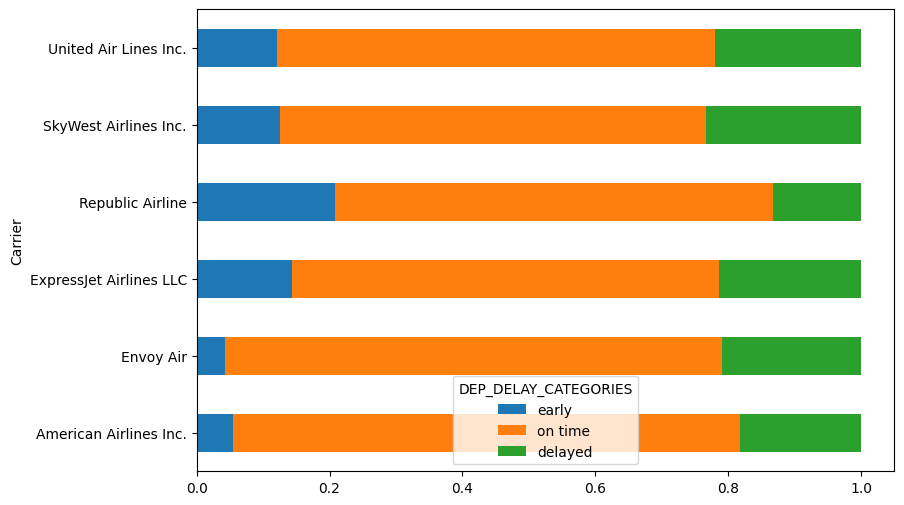

In [ ]:
ref_data = data[cols]

#set origin and destination and filter
ref_data = ref_data[(ref_data['ORIGIN'] == orig) & (ref_data['DEST'] == dest)]


#pivot table with all grouped info
ref_data['COUNTER'] = 1
ref_by_delays = ref_data.groupby([ ref_data.DEP_DELAY_CATEGORIES, ref_data.Carrier]);
ref_by_delays.size().unstack(0);

ex = ref_by_delays.COUNTER.sum().unstack(0);
normed_ex = ex.div(ex.sum(axis=1), axis=0);
normed_ex.plot(kind='barh', stacked=True,figsize=(9,6));

**Time taken to analyze each airline carriers delay categories: 2.097s**

In [ ]:
#Get data delayed flights
plot_data = data[cols]

#set origin, destination and category and filter
cat = 'delayed' # 'early' | 'on time' | 'delayed'
plot_data = plot_data[(plot_data['ORIGIN'] == orig) & (plot_data['DEST'] == dest) & (plot_data['DEP_DELAY_CATEGORIES'] == cat)]

#pivot table with delays grouped flights
plot_data['COUNTER'] = 1
by_delays = plot_data.pivot_table(['COUNTER'],index=['Carrier'], columns='INTERVAL', aggfunc='sum')
print('Delayed flights in each time interval of the day:')
by_delays

Delayed flights in each time interval of the day:


<ipython-input-36-f0ef967bf9bb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['COUNTER'] = 1


COUNTER                        
INTERVAL                early morning morning afternoon night
Carrier                                                      
American Airlines Inc.              1      23        59     1
Envoy Air                           0      10        29     0
ExpressJet Airlines LLC             0       2         1     0
Republic Airline                    0       1        13     0
SkyWest Airlines Inc.               0       5        22     1
United Air Lines Inc.               0       6        22     3

In [ ]:
#Get reference data with all flys
ref_data = data[cols]

#set origin and destination and filter
ref_data = ref_data[(ref_data['ORIGIN'] == orig) & (ref_data['DEST'] == dest)]

#pivot table with all grouped info
ref_data['COUNTER'] = 1
ref_by_delays = my_orig_dest.pivot_table(['COUNTER'],index=['Carrier'], columns='INTERVAL',  aggfunc='sum')
print('Flights in each time interval of the day:')
ref_by_delays

Flights in each time interval of the day:


<ipython-input-37-3b6ab7ed4d52>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_data['COUNTER'] = 1


COUNTER                        
INTERVAL                early morning morning afternoon night
Carrier                                                      
American Airlines Inc.             33     216       215     1
Envoy Air                           0      77       113     0
ExpressJet Airlines LLC             0      12         2     0
Republic Airline                    1       9        96     0
SkyWest Airlines Inc.              39      20        61     1
United Air Lines Inc.               1      35       102     3

**Time taken to analyze the number of journeys wrt period of the day: 3.463s**

In [ ]:
#compute percentage of delayed flights per time interval
plot_percentage = by_delays/ref_by_delays * 100
plot_percentage.fillna(0, inplace=True)
plot_percentage

COUNTER                             
INTERVAL                early morning    morning  afternoon  night
Carrier                                                           
American Airlines Inc.       3.030303  10.648148  27.441860  100.0
Envoy Air                    0.000000  12.987013  25.663717    0.0
ExpressJet Airlines LLC      0.000000  16.666667  50.000000    0.0
Republic Airline             0.000000  11.111111  13.541667    0.0
SkyWest Airlines Inc.        0.000000  25.000000  36.065574  100.0
United Air Lines Inc.        0.000000  17.142857  21.568627  100.0

**Time taken to analyze and plot the percentage of journeys wrt period of day: 0.028s**

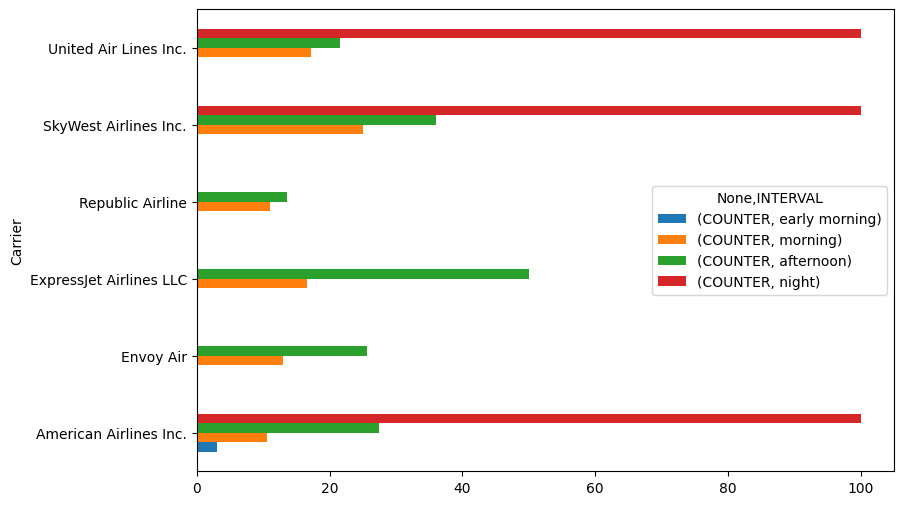

In [ ]:
#plot
plot_percentage.plot(kind='barh', stacked=False,figsize=(9,6));